In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# Load the MNIST dataset (handwritten digits 0-9) 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Normalize pixel values to [0, 1] range for better training 
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Define the neural network model 
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 1D 
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons 
    keras.layers.Dense(10, activation='softmax') # Output layer (10 classes) 
])

D:\aana\envs\dl_lab_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
# Train the model on the training data 
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8732 - loss: 0.4408
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9642 - loss: 0.1203
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9757 - loss: 0.0821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9811 - loss: 0.0623
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0437


In [8]:
# Evaluate the model on test data 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) 
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9766 - loss: 0.0779

Test accuracy: 0.9766


In [9]:
# Make predictions 
predictions = model.predict(x_test) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
# Plot some predictions
def plot_image(i, predictions_array, true_label, img): 
    plt.grid(False) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.imshow(img, cmap=plt.cm.binary) 
    predicted_label = np.argmax(predictions_array) 
    true_label = true_label[i] 
    if predicted_label == true_label: 
        color = 'blue' 
    else: 
        color = 'red' 
    plt.xlabel(f"Predict:{predicted_label}, True:{true_label}", color=color)

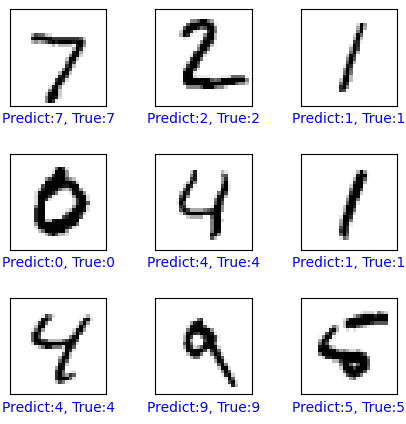

In [19]:
# Display a few sample predictions
num_rows, num_cols = 3, 3
plt.figure(figsize=(5, 5))  # Make the figure a bit larger

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions[i], y_test, x_test[i])

# Add space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()